<h1>Analysis of Global Climate Change Indicators</h1>

Contributor: Ayaan Hussain

<a id="introduction"></a>
<h2>Introduction</h3>

Climate change remains one of the most critical challenges facing humanity. The steady accumulation of greenhouse gases in the Earth's atmosphere, primarily due to human activities such as the burning of fossil fuels, deforestation, and industrial processes, has led to significant and disruptive changes in our climate system. These changes result in rising global temperatures, altered weather patterns, and increased frequency of extreme weather events. Understanding and predicting these trends are not only crucial for gauging future impacts but also for developing effective strategies to mitigate and adapt to these changes.

Effective combat against climate change requires a coordinated global effort encompassing not only scientific understanding and technological innovations but also comprehensive policy initiatives. Policies aimed at reducing greenhouse gas emissions, promoting renewable energy, conserving natural resources, and enhancing sustainability are critical. These initiatives can guide industries, influence public behavior, and reshape national and global economies toward a more sustainable future.

One notable example of international policy efforts to address climate change is the Kyoto Protocol. Adopted in 1997 and entering into force in 2005, the Kyoto Protocol was one of the first international agreements that set legally binding emission reduction targets for participating countries. By the end of the first commitment period in 2012, many countries had met or exceeded their targets, leading to a collective reduction in greenhouse gas emissions and fostering investments in renewable energy and clean technologies. The protocol's mechanisms enforced commitments and promoted the use of cleaner technologies, serving as a precursor to more comprehensive agreements like the Paris Agreement. By examining the impacts and effectiveness of the Kyoto Protocol through data-driven insights, we can better understand its roles and refine future strategies.

In this tutorial, we will explore the trends in various climate change indicators such as carbon emissions and global temperatures. Additionally, we will delve into how machine learning techniques can be used to predict future environmental trends and assess the potential impacts of changes. This guide aims to walk you through the entire data science process—from data curation and exploratory data analysis to hypothesis testing and machine learning modeling—highlighting how data can inform policy-making and contribute to the global response to climate change.

Over this tutorial we will be going through the Data Science Lifecycle in the following order:
* [Introduction](#introduction)
* [Data Collection](#data-collection)
* [Data Processing](#data-processing)
* [Data Analysis](#data-analysis)
    * [Global Carbon Emissions Over Time](#emissions-over-time)
    * [Trends in Carbon Emissions by Type Over Time](#types-emissions-time)
    * [Global Temperature Over Time](#temperature-over-time)
    * [Correlation of Climate Indicators](#correlation-indicators)
* [Hypothesis Testing and Machine Learning](#statistics)
    * [Hypothesis Testing: Influence of Kyoto Protocol on Carbon Emissions](#hypothesis-testing)
    * [Gradient Descent Linear Regression](#gradient-descent)
    * [LSTM Model for Predicting Future Carbon Emissions](#lstm-model)
* [Insight and Policy Decision](#insight-policy)


<h2>Imports</h2>

In this project, we employ a suite of  Python libraries designed for data manipulation, visualization, statistical analysis, and machine learning. Pandas is crucial for handling structured data, allowing for efficient data manipulation and preparation. Matplotlib and Seaborn assist in our data visualization, working together to provide extensive capabilities for creating both basic and advanced graphical representations. Matplotlib offers detailed control over charts, while Seaborn adds statistical plotting functionality. NumPy enhances performance with support for large, multi-dimensional arrays and matrices, used in numerical computations. SciPy is equipped with tools for more complex operations, such as statistical testing, which is fundamental in hypothesis testing. For machine learning, Scikit-learn offers practical data mining tools, including functions for standardizing data, which is essential for preparing data for modeling. We also utilize Keras, a high-level neural networks API that facilitates rapid construction and training of models, particularly useful for developing LSTM models that predict future trends based on sequential data. Each library provides a different essential support for the range of tasks that are involved in the entire data science pipeline.

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

<a id="data-collection"></a>
<h2>Data Collection</h2>

At this stage in the data science life cycle, we must identify a dataset that could be used to investigate our topic. It's important to ensure that the dataset relates to your topic, but also comes from a reputable source. At the end of the day, we don't want to use made-up data to make predictions and informed decisions about policy.

We used datahub.io, a helpful site with many different datasets relating to climate change organized in one place. They offer the datasets in very simple .csv formats, which saves us a lot of time in managing the file. After navigating to the website, we found that we could use the dataset "Global CO2 Emissions from Fossil Fuels since 1751" as it provided global carbon emissions dating back to 1751. A lot of entries were blank in columns predating 1950 though, so we cut those columns out. Additionally, to provide an additional layer of depth to our investigation, it is nice to include another feature, which led us to the dataset "Global Temperature Time Series". Now, equipped with datasets that directly relate to our topic of climate change, we are ready to dive deeper into the data science pipeline.

In [110]:
# csv Files downloaded from datahub.io
carbon_emissions = pd.read_csv("carbon_emissions.csv")
global_temperatures = pd.read_csv("temperature.csv")

<a id="data-processing"></a>
<h2>Data Processing</h2>

As previously mentioned, datahub.io configures their datasets in a way that makes it really for us data scientists to use. Very little is required in terms of data processing. The goal is to structure the two datasets so that we have two  pandas dataframe of all the climate change indicators, with no unncessary information, to do our operations on later on in the project.

The .csv file of global temperature anomalies has a 'Source' column that doesn't provide useful information so we drop it. Additionally, the datasets contains some rows with missing entries, which would interfere with our operations on the data later on, so we drop these rows. Doing the row drops in place preserves the structure of the dataframe so we don't have a weird looking table that's hard to navigate.

In [111]:
# Drop the source column as it is uncessary information
global_temperatures = global_temperatures.drop(columns=['Source'])

# Drop any rows containing missing values in place
carbon_emissions.dropna(inplace=True)
global_temperatures.dropna(inplace=True)

Now we have two dataframes. The carbon emissions dataframe contains data on the different categories of carbon emissions as well as a total, sorted by year. The global temperatures dataframe gives the global mean temperature anomaly by year. Mean temperature anomaly is a standardized way of analyzing how the climate of the globe is slowly changing from what is normal in previous years.

Finally, as most of our operations involve the total emissions and mean anomaly columns (as well as the corresponding year), we ensure that these columns contain numeric values as we will be using numpy arrays and conducting numerical operations with this data.

Now, we print the first few rows from each dataset so that we can ensure our data looks good and also so that you can visualize what we are working with.

In [112]:
# Ensure the data types are correct
carbon_emissions['Year'] = pd.to_numeric(carbon_emissions['Year'], errors='coerce')
carbon_emissions['Total'] = pd.to_numeric(carbon_emissions['Total'], errors='coerce')
global_temperatures['Year'] = pd.to_numeric(global_temperatures['Year'], errors='coerce')
global_temperatures['Mean'] = pd.to_numeric(global_temperatures['Mean'], errors='coerce')

# Display the first few rows of each dataset
print(carbon_emissions.head())
print(global_temperatures.head())

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  2010   9167      1702         3114        3842     450           59   
1  2009   8740      1585         3056        3620     413           66   
2  2008   8783      1631         3122        3571     388           71   
3  2007   8566      1572         3081        3464     382           68   
4  2006   8370      1525         3089        3339     356           61   

   Per Capita  
0        1.33  
1        1.28  
2        1.30  
3        1.28  
4        1.27  
   Year    Mean
0  2016  0.9363
1  2015  0.8998
2  2014  0.7408
3  2013  0.6679
4  2012  0.6240


<a id="data-analysis"></a>
<h2>Data Visualization</h2>

<a id="emissions-over-time"></a>
<h3>Global Carbon Emissions Over Time</h3>

This section of the data science pipeline involves building visualizations, such as graphs, of the data so that we can better understand what we are working with and identify any possible connections that are worth investigating. 

A big part of this project involves how carbon emissions has grown over the years, heavily influencing climate change. The first visualization we will build is a graph that plots the global carbon emissions in megatonnes over time. This will just consist of a simple line graph using Matplotlib and Seaborn to plot the total carbon emissions over the years.

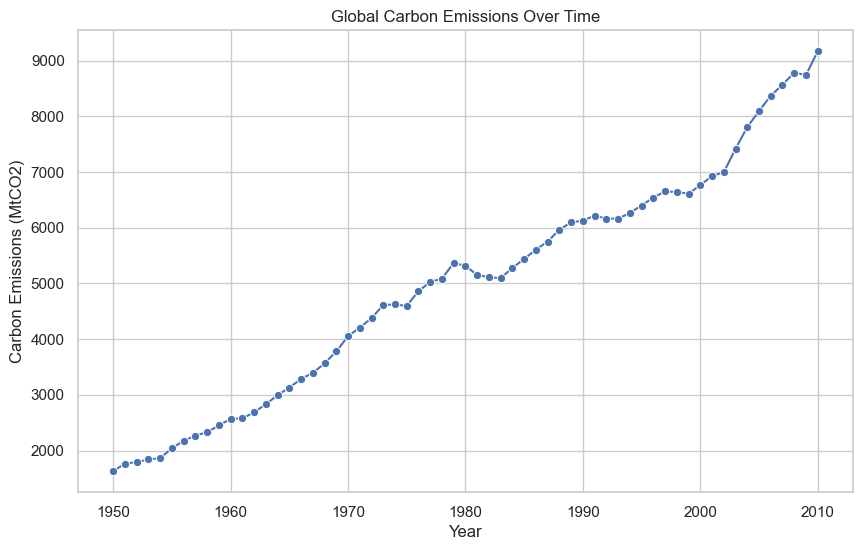

In [113]:
# Plotting Carbon Emissions over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=carbon_emissions, x='Year', y='Total', marker='o')
plt.title('Global Carbon Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions (MtCO2)')
plt.show()

This graph makes it really clear just how drastic the increase in emissions has been over the past century. The rate of increase has grown dangerously high in the later years of the dataset as well. This increase is typically due to factors like industrial expansion, growing energy demands, increased use of automobiles, and reliance on coal and oil. Such a trend emphasizes the necessity of better acknowledgement and legislation to combat these contributing factors.

<a id="types-emissions-time"></a>
<h3>Trends of Carbon Emissions by Type Over Time</h3>

The carbon emissions dataset provides us with the global carbon emissions broken down into several categories of emissions as well: Gas Fuel, Liquid Fuel, Solid Fuel, Cement, Gas Flaring, and Per Capita emissions. Understanding how the influence of different types of emissions may grow or shrink over time with the overall trend of growth in total emissions gives us even deeper insight. With this, it becomes more clear what specific types of societal changes may be stronger contributors to climate change. For this, we construct a plot using Matplotlib and Seaborn to generate lines for each of the different types of emissions and includes a legend to identify which emissions are represented by which lines.

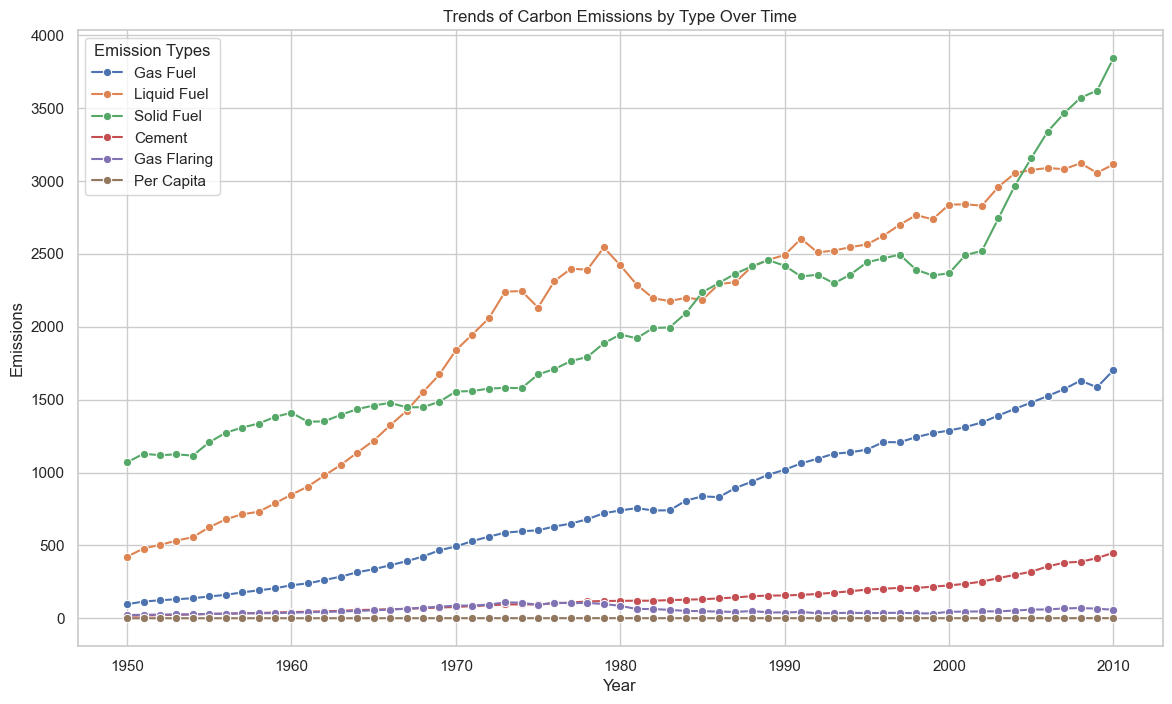

In [114]:
# Plotting different types of carbon emission over time
plt.figure(figsize=(14, 8))

sns.lineplot(x='Year', y='Gas Fuel', data=carbon_emissions, label='Gas Fuel', marker='o')
sns.lineplot(x='Year', y='Liquid Fuel', data=carbon_emissions, label='Liquid Fuel', marker='o')
sns.lineplot(x='Year', y='Solid Fuel', data=carbon_emissions, label='Solid Fuel', marker='o')
sns.lineplot(x='Year', y='Cement', data=carbon_emissions, label='Cement', marker='o')
sns.lineplot(x='Year', y='Gas Flaring', data=carbon_emissions, label='Gas Flaring', marker='o')
sns.lineplot(x='Year', y='Per Capita', data=carbon_emissions, label='Per Capita', marker='o')

plt.title('Trends of Carbon Emissions by Type Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions')

# Adding a legend
plt.legend(title='Emission Types')

plt.show()

As a result of plotting this line graph, we are able to observe several trends in the different types of carbon emissions over time. Firstly, it is very clear that emissions per capita and gas flaring have had extremely negligible contributions to the overall carbon emissions, especially in recent years as other types of emissions have grown much more significantly. Cement also has minimal influence, although it is growing somewhat in recent years, likely due to the increased urbanization of many countries. Gas fuel also shows a very steady increase throughout the century. Finally, liquid and solid fuel show the most dramatic changes, with a very large overall increase in emissions that is occasionally accompanied by some dips.

<a id="temperature-over-time"></a>
<h3>Global Temperatures Over Time</h3>

The dataset giving the global mean temperature anomalies doesn't provide too much data. However, we are able to construct an interesting line graph from the data of the means over time. Once again, a few simple calls to Matplotlib and Seaborn functions enables us to construct such a visualization.

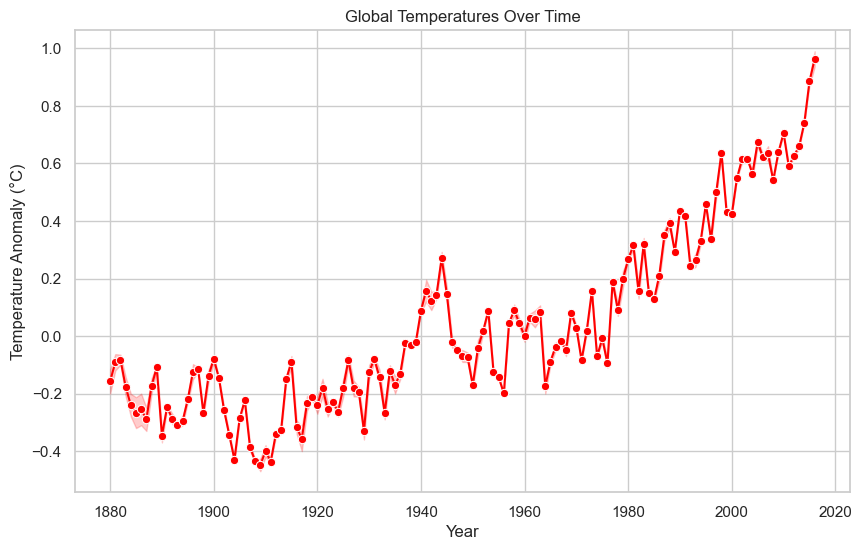

In [115]:
# Clarifying data is Mean Temperature Anomaly
global_temperatures.rename(columns={'Mean': 'Mean Temp Anomaly'}, inplace=True)

# Plotting Global Temperatures over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_temperatures, x='Year', y='Mean Temp Anomaly', marker='o', color='red')
plt.title('Global Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

Here it becomes clear that although the temperature was fluctuating a lot from year to year, it was consistently around the same temperature anomaly each year. Only from 1980 onwards do we see the temperature start to take a steady climb. This trend seems to mirror the growth of the carbon emissions over time fairly closely. That makes sense considering carbon emissions are one of the biggest contributors to climate change.

<a id="correlation-indicators"></a>
<h3>Correlation of Climate Indictors</h3>

Finally, we will be building a correlation matrix with a heat map to better understand how the different types of carbon emissions relate to each other and to the overall increase in global warming. A correlation matrix for climate indicators is a valuable tool used to visually and quantitatively analyze the relationships between different variables that affect climate change. By constructing this matrix, we can identify how strongly these factors are interrelated. This is crucial for understanding which variables most significantly impact global warming, as strong correlations can suggest potential targets for regulatory measures. Additionally, the matrix helps pinpoint redundancies or unique contributions of different emissions sources, aiding in the development of more focused and effective environmental policies.

To accomplish this, we merge the dataframes into a single merged dataframe. We drop the year and total column as we really want to see a breakdown of how different types of emissions contribute. We obviously know that carbon emissions in general contribute to climate change.

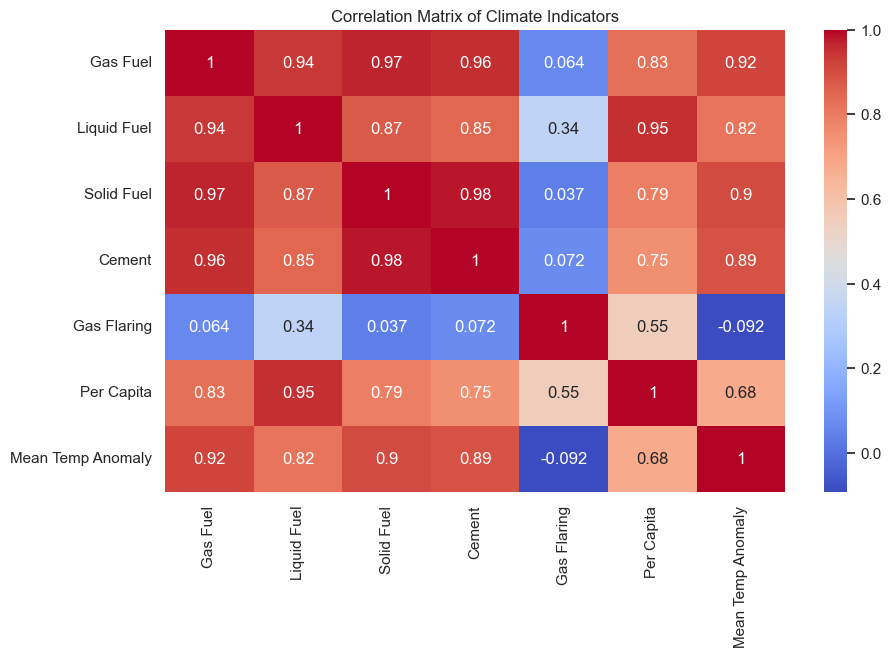

In [116]:
# Drop 'Total' from carbon emissions data but keep 'Year' for merging
carbon_emissions_reduced = carbon_emissions.drop(['Total'], axis=1)

# Merge the modified carbon emissions data with temperature data on 'Year'
merged_data = pd.merge(carbon_emissions_reduced, global_temperatures, on='Year')

# Now drop 'Year' as it's unecessary for the correlation matrix
merged_data = merged_data.drop(['Year'], axis=1)

# Plot the correlation matrix of the merged data
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Climate Indicators')
plt.show()

From this heat map, it is clear that gas flaring has a very limited influence over the rest of the factors and the temperature anomaly. Gas fuel had the highest coefficient, suggesting it has the strongest correlation with the increasing temperature anomaly with solid fuel and cement following closely behind. Emissions per capita and liquid fuel also showed somewhat positive relationships, but to lower degrees.

Additionally, there is a very strong relationship between gas fuel, liquid fuel, solid fuel, and cement. This suggests that growth in emissions in any of these emission types would be accompanied by an increase of the other types to a similar magnitude.

<a id="statistics"></a>
<h2>Hypothesis Testing and Machine Learning</h2>

Now that we understand our data better, we can start formulating hypotheses for policies relating to the data and using statistical analysis to determine the efficacy of initiatives aimed at reducing carbon emissions for reducing climate change. We can dive even deeper by developing machine learning models to predict how the continued growth in emissions may further influence the mean temperature anomaly globally and even predict how these emissions may grow in coming years.

<a id="hypothesis-testing"></a>
<h3>Hypothesis Testing: Influence of Kyoto Protocol on Carbon Emissions</h3>

The Kyoto Protocol, an agreement amongst several nations put into action in 2004, was designed to limit the carbon emissions of these nations in the hopes of reducing their contribution to climate change. To determine whether the Kyoto Protocol actually made an impact, and to ascertain whether or not similar policies could be effectively implemented in the future. We will conduct a Welch's t-test to make this determination.

The null hypothesis for this analysis is that there is no statistically significant difference in the total observed carbon emissions before and after the enactment of the Kyoto Protocol in 2004.

The alternative hypothesis is that there is a statistically significant difference in the total observed carbon emissions before and after the enactment of the Kyoto Protocol in 2004.

In [117]:
# Extract relevant parts of the data
kyoto_before = carbon_emissions[carbon_emissions['Year'] <= 2004]['Total']
kyoto_after = carbon_emissions[(carbon_emissions['Year'] >= 2005) & (carbon_emissions['Year'] <= 2014)]['Total']

# Calculate means and variances
mean_kyoto_before = np.mean(kyoto_before)
mean_kyoto_after = np.mean(kyoto_after)
var_kyoto_before = np.var(kyoto_before, ddof=1)
var_kyoto_after = np.var(kyoto_after, ddof=1)

# Sample sizes
n_kyoto_before = len(kyoto_before)
n_kyoto_after = len(kyoto_after)

# T-statistic calculation
t_stat_kyoto = (mean_kyoto_before - mean_kyoto_after) / np.sqrt(var_kyoto_before/n_kyoto_before + var_kyoto_after/n_kyoto_after)

# Degrees of freedom (Welch-Satterthwaite)
df_kyoto = ((var_kyoto_before/n_kyoto_before + var_kyoto_after/n_kyoto_after)**2) / \
           ((var_kyoto_before**2 / ((n_kyoto_before**2) * (n_kyoto_before - 1))) + \
            (var_kyoto_after**2 / ((n_kyoto_after**2) * (n_kyoto_after - 1))))

# P-value calculation
p_value_kyoto = (1 - t.cdf(np.abs(t_stat_kyoto), df_kyoto)) * 2

# Print results
print("Kyoto Protocol Analysis")
print(f"T-Statistic: {t_stat_kyoto}")
print(f"Degrees of Freedom: {df_kyoto}")
print(f"P-Value: {p_value_kyoto}")

Kyoto Protocol Analysis
T-Statistic: -14.295486829911392
Degrees of Freedom: 38.72318327699684
P-Value: 0.0


From the statistical analysis, we have found a t-statistics of approximately -13.2955, 38.7232 degrees of freedom, and a p-value of 0.0. It's not realistic that the p-value is actually 0. The reason it appears as 0 is likely because it is just so extremely small that the decimal is truncated.

The t-statistic is a measure of the size of the difference relative to the variation in your sample data. The negative sign indicates that the mean carbon emissions in the period after the Kyoto Protocol was lower than the mean emissions before the protocol was implemented.

The p-value indicates the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. A p-value of 0.0 (or an extremely small value, rounded down) means the observed data are highly unlikely under the null hypothesis. A p-value this low effectively rejects the null hypothesis, suggesting that there is a statistically significant difference in carbon emissions before and after the Kyoto Protocol implementation. This is taken as strong evidence that the protocol had a measurable and significant impact on reducing carbon emissions.

<a id="gradient-descent"></a>
<h3>Gradient Descent Linear Regression</h3>

Next we will start diving into predictive modeling. Predicitive modeling is useful in scenarios such as making policy decisions about climate change because it allows us to use historical data from various sources and build a model that is well-suited to generalizing underlying trends in the data to make educated predictions about how various metrics will change in the future.

Gradient descent is a fundamental optimization algorithm used in machine learning to minimize a function by iteratively moving in the direction of the steepest descent as defined by the negative of the gradient. It is used for finding the minimum of a function, typically the loss or error function in machine learning models. The idea is to update the parameters (weights) of the model in a way that the error between the predicted and actual outcomes is minimized.

Gradient descent is particularly useful because it scales efficiently to large datasets. Only a few calculations are needed at each step, making it viable for situations where the dataset is too large to fit in memory. It can be used with a variety of different functions and models, making it versatile across many types of machine learning algorithms, from linear regression to complex neural networks. 

We will be using gradient descent to construct a linear regression that determines how an increase in total global carbon emissions can influence the global mean temperature anomaly. Gradient descent in this context is used to find the line that best fits the data, minimizing the discrepancy (or error) between the predicted temperatures from the model and the actual observed temperatures.

Optimized weights (theta): [[0.21593115]
 [0.22919066]]


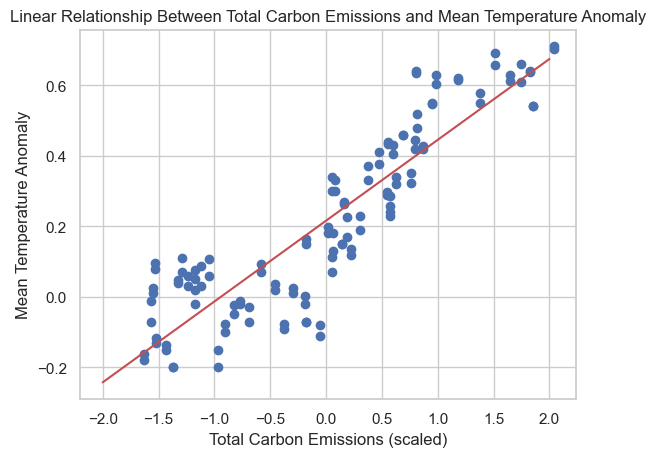

In [118]:
# Merge the datasets on 'Year'
merged_data = pd.merge(carbon_emissions, global_temperatures, on='Year')

# Select 'Total' carbon emissions as feature and 'Mean' temperature as target
X = merged_data[['Total']].values
y = merged_data[['Mean Temp Anomaly']].values

# Normalize feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement gradient descent
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]  # add x0 = 1 to each instance
learning_rate = 0.1
n_iterations = 1000
m = len(X_scaled)

loss_history = []
for iteration in range(n_iterations):
    predictions = X_b.dot(theta)
    errors = predictions - y
    mse = (errors**2).mean()  # Mean Squared Error
    loss_history.append(mse)  # append current loss
    
    gradients = 2/m * X_b.T.dot(errors)
    theta -= learning_rate * gradients

# Print the weights
print("Optimized weights (theta):", theta)

plt.scatter(X_scaled, y)
X_new_scaled = np.array([[-2], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new_scaled]
y_predict = X_new_b.dot(theta)
plt.plot(X_new_scaled, y_predict, "r-")
plt.xlabel('Total Carbon Emissions (scaled)')
plt.ylabel('Mean Temperature Anomaly')
plt.title('Linear Relationship Between Total Carbon Emissions and Mean Temperature Anomaly')
plt.show()

This graph illustrates a linear relationship between total carbon emissions (scaled) and mean temperature anomaly. The x-axis represents the scaled total carbon emissions, allowing for a standardized comparison regardless of the original magnitude of emissions. The y-axis shows the mean temperature anomaly.

The scattered blue points represent individual data observations, each showing the temperature anomaly for a corresponding level of carbon emissions in a given year. The red line is the result of a linear regression analysis with a gradient descent algorithm, indicating a clear upward trend: as carbon emissions increase, the mean temperature anomaly also increases. This suggests a direct correlation where higher emissions are associated with greater deviations from the average temperature, aligning with the understanding that increased carbon emissions contribute to global warming.

The graph effectively communicates how incremental increases in carbon emissions are likely linked to incremental rises in temperature anomalies, reinforcing concerns about the impact of carbon emissions on global climate patterns.

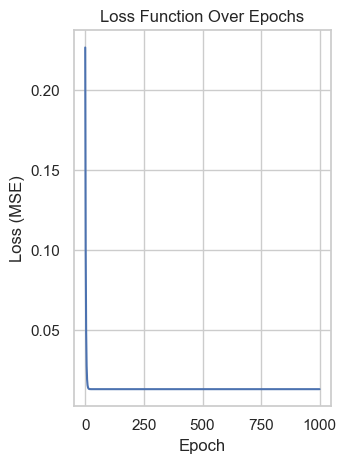

In [119]:
# Plot the loss over iterations
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.grid(True)

plt.tight_layout()
plt.show()

This graph shows the loss function measured in Mean Squared Error (MSE) over 1000 epochs during model training. The x-axis represents the epochs, and the y-axis shows the MSE. The loss decreases sharply within the initial epochs, indicating rapid learning, and then plateaus, suggesting that further training yields minimal improvement. This demonstrates that the model quickly reaches an optimal state, and additional training beyond this point may not be beneficial.

<a id="lstm-model"></a>
<h3>LSTM Model for Predicting Future Carbon Emissions</h3>

An LSTM model, or Long Short-Term Memory model, is a type of recurrent neural network specifically designed to handle sequence prediction problems. Unlike standard feedforward neural networks, LSTMs have feedback connections that make them capable of processing entire sequences of data rather than just individual datapoints. This architecture allows them to store, process, and use historical information to make predictions, making them particularly effective for time series data where current events are dependent on previous events.

LSTMs are ideal for predicting future carbon emissions because they can learn from the historical data of emissions and identify long-term trends and patterns. Carbon emissions data is inherently sequential and influenced by past values, and LSTMs can capture these dependencies over time. By learning these patterns, LSTMs can forecast future emissions based on historical data, which is crucial for planning and implementing environmental policies and measures to combat climate change. Their ability to remember long-term dependencies helps avoid problems like the vanishing gradient issue common in traditional RNNs, enhancing their effectiveness and accuracy in modeling complex sequence data like carbon emissions trends.

Epoch 1/20


C:\Users\Ayaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0120
Epoch 2/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9179e-04
Epoch 3/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3327e-04
Epoch 4/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 5/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4293e-04
Epoch 6/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8755e-04
Epoch 7/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8469e-04
Epoch 8/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 9/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1724e-04
Epoch 10/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0563e-04
Epoch 11/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3598e-04
Epoch 12/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4226e-04
Epoch 13/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014   
Epoch 14/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2701e-04
Epoch 15/20
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

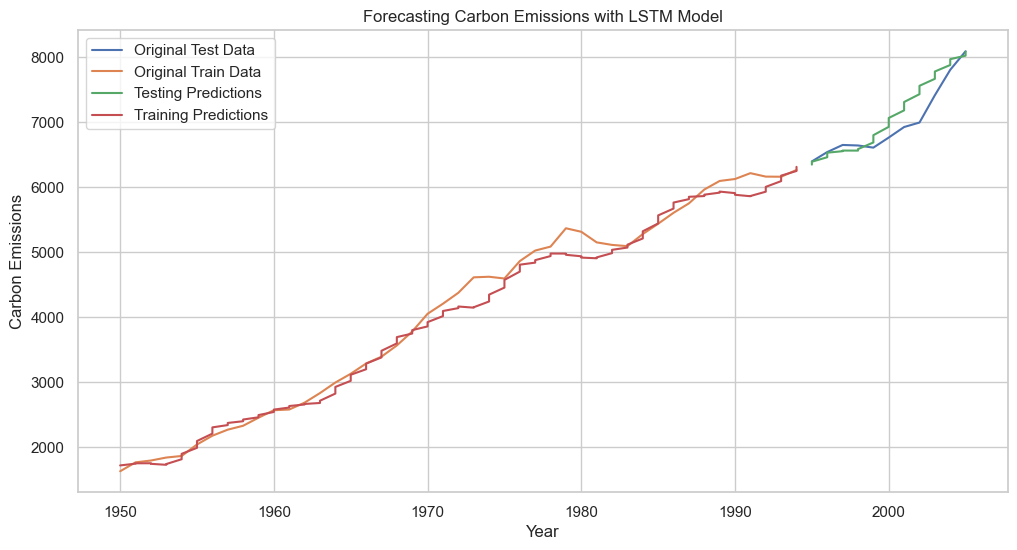

In [120]:
# Prepare data for LSTM
data = pd.merge(carbon_emissions, global_temperatures, on='Year')
variables = ['Total', 'Mean Temp Anomaly']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[variables].values)

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), :]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, Y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Define training and testing sizes inversely
train_size = int(len(X) * 0.2)  # Using the first 80% for training, later 20% for predictive testing
X_test, X_train = X[:train_size], X[train_size:]
Y_test, Y_train = Y[:train_size], Y[train_size:]

# Build and Train LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=20, batch_size=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions and actual values for plotting
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], X.shape[2]-1))), axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], X.shape[2]-1))), axis=1))[:,0]
Y_train_inv = scaler.inverse_transform(np.concatenate((Y_train.reshape(-1, 1), np.zeros((Y_train.shape[0], X.shape[2]-1))), axis=1))[:,0]
Y_test_inv = scaler.inverse_transform(np.concatenate((Y_test.reshape(-1, 1), np.zeros((Y_test.shape[0], X.shape[2]-1))), axis=1))[:,0]

# Adjusted year ranges to correctly align with prediction data lengths
train_years = data['Year'][train_size + time_step:train_size + time_step + len(train_predict)]  # Correct range for training years
test_years = data['Year'][time_step:train_size + time_step]  # Correct range for testing years

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(test_years, Y_test_inv, label='Original Test Data')
plt.plot(train_years, Y_train_inv, label='Original Train Data')
plt.plot(test_years, test_predict, label='Testing Predictions')
plt.plot(train_years, train_predict, label='Training Predictions')

plt.xlabel('Year')
plt.ylabel('Carbon Emissions')
plt.title('Forecasting Carbon Emissions with LSTM Model')
plt.legend()
plt.show()

From this we can see that the model did a good job of learning from the training data and following the trends in that datset very well. There appears to be a greater discrepancy between the predicted and actual testing data, however, this is to be expected as the model is trying to generalize trends from the training data to make predictions for the testing data.

To better analyze the performance of our model, we can use the mean squared error between each predicted and actual data point to determine how close our predictions were.

In [121]:
test_mse = mean_squared_error(Y_test_inv, test_predict)
print("Testing Mean Squared Error:", test_mse)

Testing Mean Squared Error: 52452.04200855011


Although a mean squared error of approximately 52452.0420 seems extremely large, it is important to remember that, in the context of the problem, the carbon emissions are measured in the thousands of megatonnes. Even with this in mind though, the model doesn't perform extremely well. For future, incorporating and testing different learning parameters or loss functions could possibly be used to improve the performance of the neural network. Additionally, providing a larger data set both for training and testing would give the model more resources to learn trends from and also more opportunity to make accurate guesses that would bring the MSE down

<a id="insight-policy"></a>
<h2>Insight and Policy Decision</h2>

Throughout this tutorial, we've navigated the full spectrum of the data science pipeline, from data collection and exploratory analysis to sophisticated machine learning with LSTM models. This comprehensive approach not only enhances our predictive capabilities but also deepens our understanding of complex environmental issues like carbon emissions and climate change.

Our analysis demonstrated that initiatives like the Kyoto Protocol have effectively slowed the growth of carbon emissions, highlighting the potential benefits of such environmental policies. As technology and data science methodologies advance, the accuracy of our predictions will improve, bolstering our efforts to combat climate change. Moving forward, the continued implementation of similar policies, informed by data-driven insights, represents a crucial step toward sustainable global environmental stewardship.

By applying these techniques and learning from historical data, you are now better equipped to contribute to vital environmental strategies that help shape a more sustainable future. Let’s continue to leverage these insights to advocate for and implement policies that make a significant impact.

<h3>Final Notes</h3>

You can find the github repository this page is hosted on, along with the Jupyter Notebook and .csv files used to complete this project at: https://github.com/ayaanh-03/FinalTutorial320